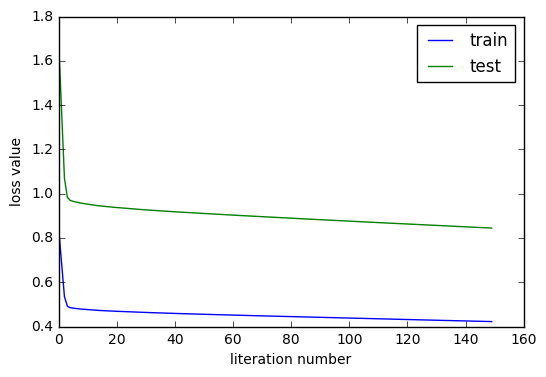

In [4]:
from sklearn.datasets import load_svmlight_file
import numpy as np
from sklearn.model_selection import train_test_split
from scipy.sparse import csr_matrix, hstack 
import matplotlib.pyplot as plt
%matplotlib inline

def data_loader(train_file):
    X,Y = load_svmlight_file(train_file)
    X = X.toarray()
    X = np.c_[np.ones((X.shape[0], 1)),X]
    return X, Y

def train_test(X, Y, theta):
    #Y_prediction = X.dot(theta)
    a = np.sum(theta * X, axis = 1)
    b = Y * a
    c = 0
    for i in range(X.shape[0]):
        c = c + max(0, 1 - b[i])
    loss = np.linalg.norm(theta)**2 / 2 + c
    return loss

def NAG(X,Y,learn_rate=.05, gamma=.9):
    X_matrix = np.mat(X)
    Y_matrix = np.mat(Y)
    m,n = np.shape(X_matrix)
    maxCycle = 500
    W = np.ones((n,1))
    v = np.ones((n,1))
    for k in range(maxCycle):
        G = sto_batch_grad(X_matrix,Y_matrix,W-gamma*v)
        v = gamma * v + learn_rate * G
        W = W - v
    return W
        
        
def RMSProp(X,Y,learn_rate=0.001, gamma=0.9, epsilon=1e-8):
    X_matrix = np.mat(X)
    Y_matrix = np.mat(Y)
    m,n = np.shape(X_matrix)
    maxCycle = 500
    G = np.ones((n,1))
    W = np.ones((n,1))
    for k in range(maxCycle):
        g = sto_batch_grad(X_matrix,Y_matrix,W)
        G = gamma * G + (1 - gamma) * np.sqr(g)
        W = W - learn_rate * g / np.sqrt(next_G[i] + epsilon)
    return W


def AdaDelta(X,Y,gamma=0.95, epsilon=1e-6):
    X_matrix = np.mat(X)
    Y_matrix = np.mat(Y)
    m,n = np.shape(X_matrix)
    maxCycle = 500
    W = np.ones((n,1))
    G = np.ones((n,1))
    dw = np.ones((n,1))
    t = np.ones((n,1))
    for k in range(maxCycle):
        g = sto_batch_grad(X_matrix,Y_matrix,W)
        G = gamma * G + (1 - gamma) *np.sqrt(g)
        dw = np.sqrt(t+epsilon)/np.sqrt(G+epsilon)
        W = W + dw
        t = gamma * t + (1-gamma)*np.sqrt(dw)
    return W


def Adam(X,Y, learn_rate=0.002, gamma=0.999, beta=0.9, epsilon=1e-8):
    X_matrix = np.mat(X)
    Y_matrix = np.mat(Y)
    m,n = np.shape(X_matrix)
    maxCycle = 500
    W = np.ones((n,1))
    m = np.ones((n,1))
    t=1
    for k in range(maxCycle):
        g = sto_batch_grad(X_matrix,Y_matrix,W)
        m = beta * m + (1 - beta) * g
        G = gamma * G + (1 - gamma) * np.sqrt(g)
        W = W - learn_rate * np.sqrt(1 - gamma ** t)/(1 - beta ** t) * m / np.sqrt(G + epsilon)
    return W


if __name__ =="__main__":
    X_train,Y_train = data_loader("a9a")
    X_test,Y_test = data_loader("a9a.t")
    theta = np.zeros((1,X_train.shape[1])) 
    L_train = np.zeros((150))
    L_validation = np.zeros((150))
    prediction_rate = np.zeros((150))
    learning_rate = 0.000150
    threshold = -1
    for t in range(150):
        #Y_prediction = X.dot(theta) 
        G = theta
        e = np.sum(theta * X_train, axis = 1)
        f = 1 - Y_train * e
        for j in range(0, 482):
            if f[j] >= 0:
                G = G - X_train[j] * Y_train[j]
            else:
                G = G 
        
        theta -= learning_rate * G
        
        pre = np.sum(theta * X_train, axis = 1)
    
        count = 0
        for j in range(690):
            if pre[j] > threshold:
                pre[j] = 1
            elif pre[j] < threshold:
                pre[j] = -1
                
            if pre[j] == Y_test[j]:
                count += 1
            
        prediction_rate[t] = count / 16281
        L_train[t]=train_test(X_train, Y_train, theta)/(32561)
        L_validation[t]=train_test(X_train, Y_train, theta)/(16281)
    
    #print('L_train:\n',L_train)
    #print('L_validation:\n',L_validation)
    plt.plot(L_train,label='train')
    plt.plot(L_validation,label='test')
    plt.ylabel('loss value')
    plt.xlabel('literation number')
    plt.legend() 
    